In [305]:
import os
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [306]:
ontario_dataset = pd.read_csv(Path("regional data/ONTARIO.csv"))

In [307]:
ontario_dataset.rename(columns = {'Composite_Benchmark_SA':'close'}, inplace = True)

In [308]:
ontario_dataset = ontario_dataset.drop(columns=["Composite_HPI_SA", "Single_Family_HPI_SA", "One_Storey_HPI_SA", "Two_Storey_HPI_SA", "Townhouse_HPI_SA", "Apartment_HPI_SA", "Single_Family_Benchmark_SA", "One_Storey_Benchmark_SA", "Two_Storey_Benchmark_SA", "Townhouse_Benchmark_SA", "Apartment_Benchmark_SA"])

In [309]:
ontario_dataset.head()

,Date,close
0,Jan 2005,219800.0
1,Feb 2005,222500.0
2,Mar 2005,225400.0
3,Apr 2005,229300.0
4,May 2005,233000.0


In [310]:
ontario_dataset['Benchmark']= 'benchmark'
ontario_dataset.head()

,Date,close,Benchmark
0,Jan 2005,219800.0,benchmark
1,Feb 2005,222500.0,benchmark
2,Mar 2005,225400.0,benchmark
3,Apr 2005,229300.0,benchmark
4,May 2005,233000.0,benchmark


In [311]:
ontario_dataset = ontario_dataset.set_index(['Date','Benchmark']).stack().unstack([1,2])


In [312]:
ontario_dataset

Benchmark,benchmark
,close
Date,
Apr 2005,229300.0
Apr 2006,268200.0
Apr 2007,295700.0
Apr 2008,321200.0
Apr 2009,303700.0
...,...
Sep 2018,610800.0
Sep 2019,626200.0


In [313]:
MC_10_year = MCSimulation(portfolio_data = ontario_dataset, weights =[1], num_simulation = 500, num_trading_days=365*1)

In [314]:
MC_15_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.199151e+00,1.174609e+00,1.337470e+00,1.002512e+00,1.089934e+00,8.833321e-01,1.002769e+00,9.669944e-01,1.052881e+00,1.001594e+00,...,1.138905e+00,1.300115e+00,1.149121e+00,7.617177e-01,1.004178e+00,9.454700e-01,1.036041e+00,1.093836e+00,8.575007e-01,9.024363e-01
2,1.449389e+00,1.522799e+00,1.560676e+00,8.776050e-01,1.012108e+00,9.475105e-01,4.482885e-01,1.078582e+00,1.131699e+00,7.515287e-01,...,1.709513e+00,1.208011e+00,1.517820e+00,8.151470e-01,1.431128e+00,7.168025e-01,7.769377e-01,7.408349e-01,1.098618e+00,1.107795e+00
3,1.892852e+00,1.737739e+00,1.169621e+00,1.203030e+00,1.099415e+00,1.019998e+00,4.797765e-01,1.038884e+00,1.043476e+00,8.252216e-01,...,1.460136e+00,8.602605e-01,1.460838e+00,7.980808e-01,1.670909e+00,5.338602e-01,6.029068e-01,8.581748e-01,1.238088e+00,1.408773e+00
4,1.869778e+00,2.305887e+00,1.716998e+00,1.621363e+00,1.306555e+00,9.733170e-01,6.387123e-01,6.894402e-01,1.238440e+00,1.067711e+00,...,1.291326e+00,8.497616e-01,1.797720e+00,1.002245e+00,1.687339e+00,4.209046e-01,4.896405e-01,1.003725e+00,1.268442e+00,1.295317e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471,2.436675e+59,3.620910e+58,9.235442e+53,3.080361e+74,3.058574e+48,4.039040e+55,4.764277e+54,1.105360e+54,5.438398e+46,2.674245e+58,...,1.641353e+66,6.395943e+63,5.889845e+48,4.857173e+47,1.198693e+63,9.895607e+55,5.746890e+67,1.361345e+57,1.228879e+56,8.395773e+59
5472,1.995142e+59,3.119358e+58,1.015203e+54,2.870057e+74,2.991480e+48,6.117644e+55,5.102065e+54,8.458696e+53,6.649028e+46,2.771921e+58,...,2.131538e+66,5.835462e+63,6.794881e+48,5.941859e+47,7.958277e+62,1.105780e+56,5.508385e+67,9.724397e+56,1.434026e+56,8.105890e+59
5473,1.997029e+59,4.432535e+58,9.490316e+53,4.376824e+74,3.572609e+48,6.024171e+55,6.183365e+54,6.852385e+53,6.015157e+46,3.299371e+58,...,2.730881e+66,1.434852e+63,4.385943e+48,7.322686e+47,8.887849e+62,1.160000e+56,6.947967e+67,9.140288e+56,1.186603e+56,8.759609e+59
5474,2.288853e+59,4.395807e+58,9.651576e+53,4.800522e+74,2.961092e+48,9.411707e+55,7.024598e+54,6.321864e+53,5.795775e+46,4.056435e+58,...,4.153953e+66,1.655253e+63,5.093512e+48,7.901799e+47,7.312579e+62,1.162136e+56,5.690930e+67,9.223230e+56,1.275546e+56,6.181879e+59


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 365 Trading Days.'}>

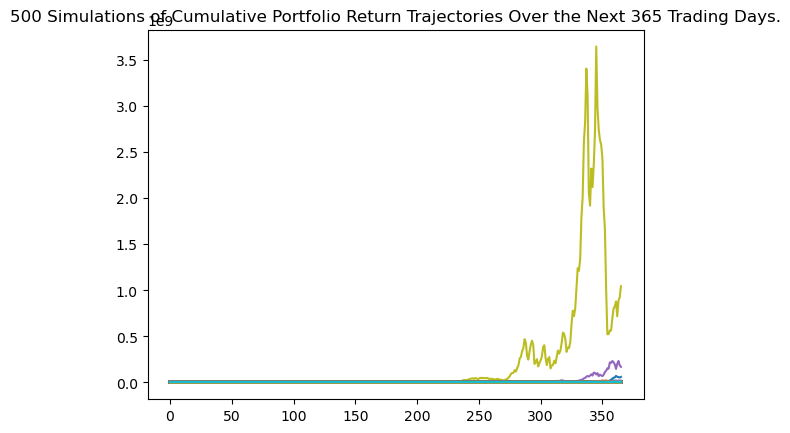

In [315]:
MC_10_year.plot_simulation()

In [316]:
tbl = MC_10_year.summarize_cumulative_return()
print(tbl)

count           5.000000e+02
mean            2.994530e+06
std             4.743739e+07
min             2.292851e-01
25%             4.227426e+02
50%             5.061169e+03
75%             8.200335e+04
max             1.045505e+09
95% CI Lower    4.664003e+00
95% CI Upper    6.577262e+06
Name: 365, dtype: float64


In [325]:
ci_lower = round(tbl[8]*219800,1)
ci_upper = round(tbl[9]*219800,1)
print(f"There is a 95% chance that an initial home investment of $219800 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial home investment of $219800 in the portfolio over the next 10 years will end within in the range of $1025147.8 and $1445682104492.7


<AxesSubplot:>

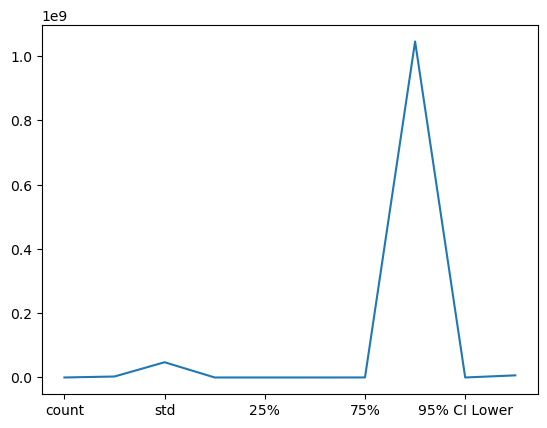

In [331]:
tbl.plot.line()